In [34]:
from sklearn import datasets, cluster, metrics
from sklearn.preprocessing import scale
from sklearn import decomposition
from plotly.subplots import make_subplots
from scipy.stats import mode
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import plot_roc_curve, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import time as time

# **DATASET: Digits**

In [35]:
digits_data = datasets.load_digits()
X_digits = scale(digits_data.data)
y_digits = digits_data.target
pca_digits = decomposition.PCA(n_components=0.95)
new_digits_data = pca_digits.fit(X_digits).transform(X_digits)
print (pca_digits.explained_variance_ratio_, sum(pca_digits.explained_variance_ratio_))

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942083 0.03389381 0.02998221 0.02932003 0.02781805 0.02577055
 0.02275303 0.0222718  0.02165229 0.01914167 0.01775547 0.01638069
 0.0159646  0.01489191 0.0134797  0.01271931 0.01165837 0.01057647
 0.00975316 0.00944559 0.00863014 0.00836643 0.00797693 0.00746471
 0.00725582 0.00691911 0.00653909 0.00640793 0.00591384 0.00571162
 0.00523637 0.00481808 0.00453719 0.00423163] 0.9507791125066466


# **Explained variance**

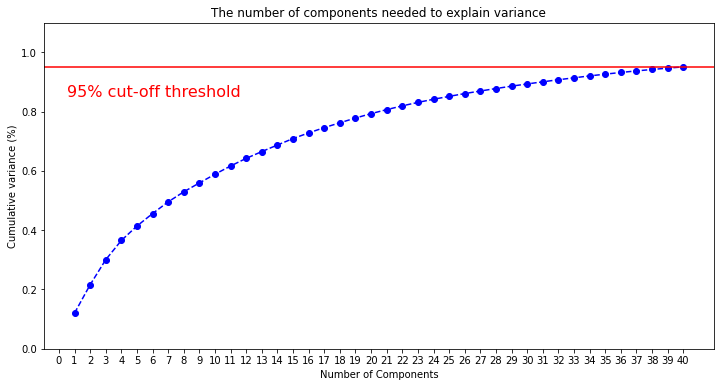

In [36]:
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, len(pca_digits.explained_variance_ratio_)+1, step=1)
y = np.cumsum(pca_digits.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(pca_digits.explained_variance_ratio_)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

# **Reconstruction error**

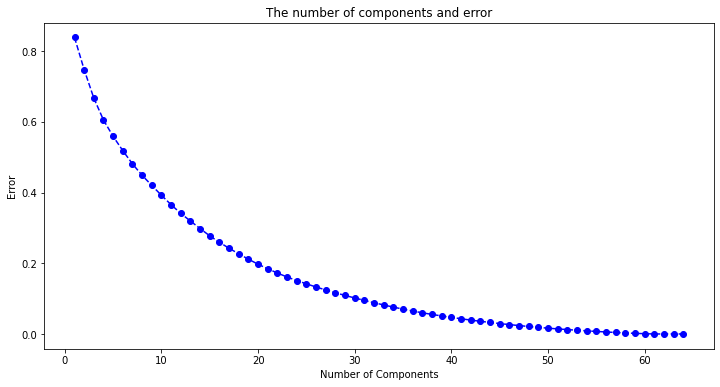

In [37]:
r = list(range(1,65))
loss = []
for i in r:
  pca = decomposition.PCA(n_components=i)
  l = pca.fit_transform(X_digits)
  m = pca.inverse_transform(l)
  loss.append(((X_digits - m)**2).mean())
plt.xlabel("Number of Components")
plt.ylabel("Error")
plt.title('The number of components and error')  
plt.plot(r, loss, marker='o', linestyle='--', color='b')

# **Kmean--digits**

In [38]:
digits_kmean = cluster.KMeans(n_clusters=10, max_iter=200)
digits_clusters = digits_kmean.fit_predict(new_digits_data)
digits_labels = np.zeros_like(digits_clusters)
for i in range(10):
    mask = (digits_clusters == i)
    digits_labels[mask] = mode(y_digits[mask])[0]
digits_accuracy = metrics.accuracy_score(y_digits, digits_labels)
print (digits_accuracy)

0.7067334446299388


# **EM--digits**

In [39]:
digits_EM = GaussianMixture(n_components=10, max_iter=200)
digits_clusters = digits_EM.fit_predict(new_digits_data)
digits_labels = np.zeros_like(digits_clusters)
for i in range(10):
    mask = (digits_clusters == i)
    digits_labels[mask] = mode(y_digits[mask])[0]
digits_accuracy = metrics.accuracy_score(y_digits, digits_labels)
print (digits_accuracy)

0.7072899276572064


# **NN--digits**

In [40]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.97      1.00      0.98        64
           2       0.94      1.00      0.97        50
           3       1.00      0.98      0.99        54
           4       0.98      0.93      0.95        55
           5       0.98      0.98      0.98        52
           6       0.98      1.00      0.99        64
           7       0.94      1.00      0.97        66
           8       0.97      0.90      0.93        67
           9       0.97      0.97      0.97        62

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

0.9730639730639731
--- 2.54016375541687 seconds ---


# **NN--digits--PCA**

In [41]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(new_digits_data, y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       0.95      0.98      0.97        60
           2       1.00      0.96      0.98        55
           3       0.96      0.93      0.95        57
           4       1.00      0.94      0.97        47
           5       0.97      0.98      0.98        61
           6       0.98      0.98      0.98        62
           7       1.00      1.00      1.00        61
           8       0.90      0.93      0.91        69
           9       0.94      0.98      0.96        52

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

0.9696969696969697
--- 2.7469394207000732 seconds ---


# **NN--digits--clusters--data**

In [42]:
u = np.concatenate((X_digits, digits_clusters.reshape(-1, 1)), axis=1)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(u, y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.98      0.97      0.97        59
           2       0.98      1.00      0.99        60
           3       0.98      0.98      0.98        51
           4       0.98      1.00      0.99        58
           5       0.98      0.98      0.98        62
           6       1.00      0.98      0.99        66
           7       0.97      1.00      0.99        74
           8       0.95      1.00      0.97        54
           9       0.96      0.90      0.93        61

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594

0.9797979797979798
--- 2.500199556350708 seconds ---


# **NN--digits--clusters**

In [43]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(digits_clusters.reshape(-1, 1), y_digits, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        64
           1       0.56      0.31      0.40        64
           2       0.00      0.00      0.00        53
           3       0.79      0.86      0.82        56
           4       0.98      0.98      0.98        57
           5       0.00      0.00      0.00        67
           6       0.99      0.97      0.98        72
           7       0.51      1.00      0.68        53
           8       0.00      0.00      0.00        55
           9       0.36      0.77      0.49        53

    accuracy                           0.59       594
   macro avg       0.46      0.59      0.49       594
weighted avg       0.47      0.59      0.50       594

0.5925925925925926
--- 2.163519859313965 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **DATASET: Wine**

In [44]:
wine_data = datasets.load_wine()
X_wine = scale(wine_data.data)
y_wine = wine_data.target
pca_wine = decomposition.PCA(n_components=0.95)
new_wine_data = pca_wine.fit(X_wine).transform(X_wine)
print (pca_wine.explained_variance_ratio_, sum(pca_wine.explained_variance_ratio_))

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019] 0.9616971684450641


# **Explained variance**

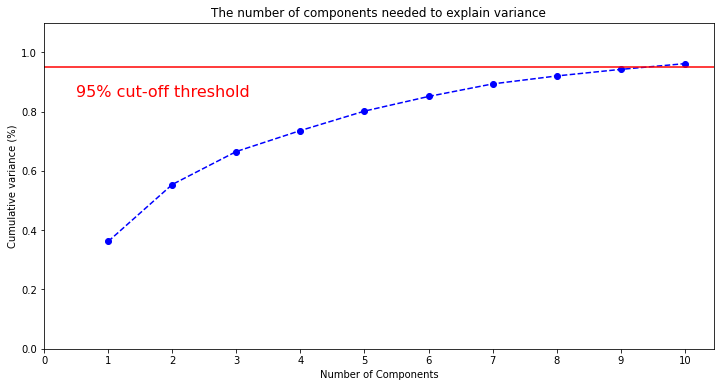

In [45]:
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, len(pca_wine.explained_variance_ratio_)+1, step=1)
y = np.cumsum(pca_wine.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(pca_wine.explained_variance_ratio_)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.show()

# **Reconstruction error**

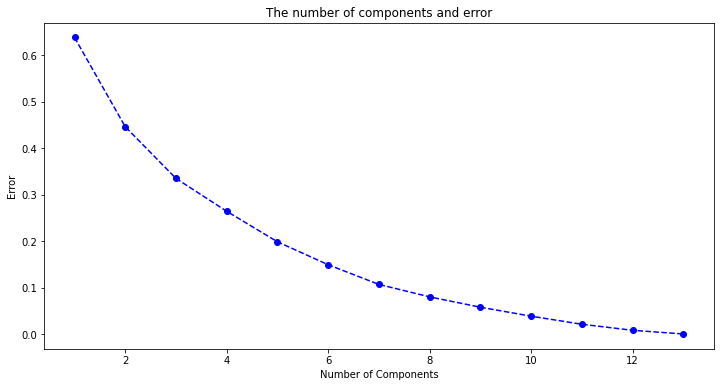

In [46]:
r = list(range(1,14))
loss = []
for i in r:
  pca = decomposition.PCA(n_components=i)
  l = pca.fit_transform(X_wine)
  m = pca.inverse_transform(l)
  loss.append(((X_wine - m)**2).mean())  
plt.xlabel("Number of Components")
plt.ylabel("Error")
plt.title('The number of components and error')
plt.plot(r, loss, marker='o', linestyle='--', color='b')

# **Kmean--wine**

In [47]:
wine_kmean = cluster.KMeans(n_clusters=3, max_iter=200)
wine_clusters = wine_kmean.fit_predict(new_wine_data)
wine_labels = np.zeros_like(wine_clusters)
for i in range(3):
    mask = (wine_clusters == i)
    wine_labels[mask] = mode(y_wine[mask])[0]
wine_accuracy = metrics.accuracy_score(y_wine, wine_labels)
print (wine_accuracy)

0.9662921348314607


# **EM--wine**

In [48]:
wine_EM = GaussianMixture(n_components=3, max_iter=200)
wine_clusters = wine_EM.fit_predict(new_wine_data)
wine_labels = np.zeros_like(wine_clusters)
for i in range(3):
    mask = (wine_clusters == i)
    wine_labels[mask] = mode(y_wine[mask])[0]
wine_accuracy = metrics.accuracy_score(y_wine, wine_labels)
print (wine_accuracy)

0.9606741573033708


# **NN--wine**

In [49]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.96      0.98        27
           2       0.92      1.00      0.96        12

    accuracy                           0.98        59
   macro avg       0.97      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59

0.9830508474576272
--- 0.30023789405822754 seconds ---


# **NN--wine--PCA**

In [50]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(new_wine_data, y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.91      0.95        23
           2       0.89      1.00      0.94        16

    accuracy                           0.97        59
   macro avg       0.96      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59

0.9661016949152542
--- 0.2349240779876709 seconds ---


# **NN--wine--clusters--data**

In [51]:
u = np.concatenate((X_wine, wine_clusters.reshape(-1, 1)), axis=1)
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(u, y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.93      0.96        27
           2       0.94      1.00      0.97        17

    accuracy                           0.97        59
   macro avg       0.96      0.98      0.97        59
weighted avg       0.97      0.97      0.97        59

0.9661016949152542
--- 0.21918106079101562 seconds ---


# **NN--wine--clusters**

In [52]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(wine_clusters.reshape(-1, 1), y_wine, test_size = 0.33)
nn = MLPClassifier(hidden_layer_sizes=(64), max_iter=500)
nn.fit(X_train, y_train)
nn_predicted = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predicted)
print (classification_report(y_test, nn_predicted))
print (nn_accuracy)
print("--- %s seconds ---" % (time.time() - start_time))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.86      0.92        21
           2       0.89      1.00      0.94        17

    accuracy                           0.95        59
   macro avg       0.95      0.95      0.95        59
weighted avg       0.95      0.95      0.95        59

0.9491525423728814
--- 0.31972551345825195 seconds ---


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.

